In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [61]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [62]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [63]:
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

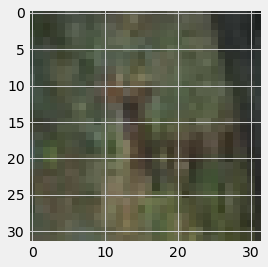

In [24]:
img = plt.imshow(x_train[index])

In [25]:
print('The image label is:', y_train[index])

The image label is: [4]


In [28]:
#Get Image Classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [29]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [30]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [31]:
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [32]:
#normalize pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test/255

In [33]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [34]:
#Create model's architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5, 5), activation = 'relu', input_shape = (32, 32, 3)) )

#Add pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#Add another convolution layer
model.add( Conv2D(32, (5, 5), activation = 'relu') )

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#Add a flattening layer
model.add(Flatten())

#Add layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

#Add drop out layer
model.add(Dropout(0.5))

#Add layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

#Add drop out layer
model.add(Dropout(0.5))

#Add layer with 250 neurons
model.add(Dense(250, activation = 'relu'))

#Add layer with 10 neurons
model.add(Dense(10, activation = 'softmax'))

In [36]:
#Compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
#Train model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 44s 277ms/step - loss: 1.7812 - accuracy: 0.3342 - val_loss: 1.6178 - val_accuracy: 0.4225
Epoch 2/10
157/157 [==============================] - 57s 365ms/step - loss: 1.4159 - accuracy: 0.4804 - val_loss: 1.3365 - val_accuracy: 0.5121
Epoch 3/10
157/157 [==============================] - 54s 345ms/step - loss: 1.2608 - accuracy: 0.5418 - val_loss: 1.2699 - val_accuracy: 0.5368
Epoch 4/10
157/157 [==============================] - 57s 361ms/step - loss: 1.1672 - accuracy: 0.5819 - val_loss: 1.1427 - val_accuracy: 0.5899
Epoch 5/10
157/157 [==============================] - 68s 433ms/step - loss: 1.0760 - accuracy: 0.6178 - val_loss: 1.0219 - val_accuracy: 0.6393
Epoch 6/10
157/157 [==============================] - 61s 386ms/step - loss: 0.9901 - accuracy: 0.6465 - val_loss: 0.9885 - val_accuracy: 0.6542
Epoch 7/10
157/157 [==============================] - 53s 336ms/step - loss: 0.9580 - accuracy: 0.6589 - val_loss: 0.9743 - val_ac

In [38]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 3s 10ms/step - loss: 0.9545 - accuracy: 0.6751


0.6751000285148621

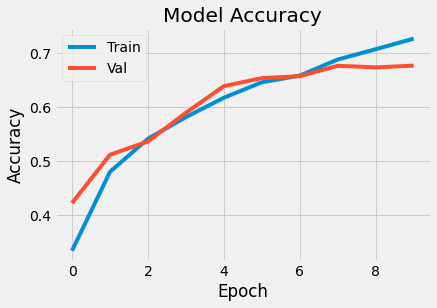

In [42]:
#Visualize model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

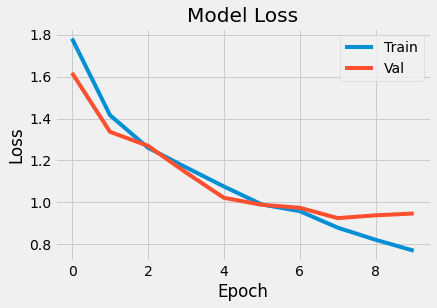

In [43]:
#Visualize model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [64]:
from IPython.display import Image
from IPython.core.display import HTML 
cat_jpg = Image(url= "https://www.pexels.com/photo/selective-focus-photography-of-orange-tabby-cat-1170986/")


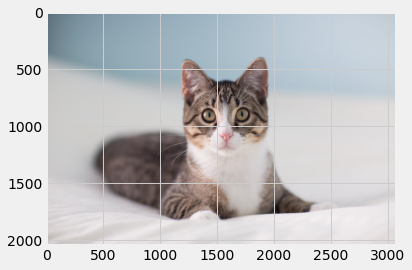

In [74]:
new_image = plt.imread('cat.jpg')
img = plt.imshow(new_image)

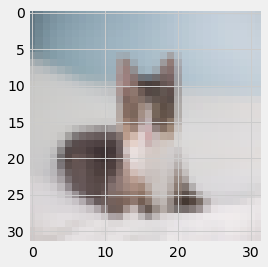

In [75]:
import skimage
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [76]:
predictions = model.predict(np.array([resized_image]))
#Show predictions
predictions

array([[0.0361703 , 0.01212521, 0.10068749, 0.1797219 , 0.07224405,
        0.1123016 , 0.04643993, 0.03997678, 0.14370859, 0.25662416]],
      dtype=float32)

In [77]:
#Sort predictions
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
print(list_index)

[9, 3, 8, 5, 2, 4, 6, 7, 0, 1]


In [78]:
for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100, 2), '%')

truck : 25.66 %
cat : 17.97 %
ship : 14.37 %
dog : 11.23 %
bird : 10.07 %
